In [84]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('C:/Users/lclai/Desktop/LDIG/DB/training/coulomb_atom.csv')
print(df.shape)

(15667, 1277)


In [40]:
df.head()

,pubchem_id,mf,Eat,1,2,3,4,5,6,7,...,244,245,246,247,248,249,250,251,252,253
0,297,H4C,-87.730911,0.915,1.002,0.866,0.930,0.584,0.547,0.565,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,674,H7C2N,-229.611409,0.685,0.420,0.859,0.925,0.859,0.497,0.478,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6559,H7C4N,-320.306041,0.721,0.409,0.279,0.275,0.920,0.907,0.466,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,31374,H9C4NO,-430.498229,0.625,0.391,0.347,0.258,0.346,0.895,0.841,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8027,H5C4N,-298.863590,0.664,0.701,0.400,0.278,0.901,0.912,0.492,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [85]:
y = df['Eat']
X1 = df.drop(['Eat','pubchem_id'], axis = 1)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X1)
X = pd.DataFrame(X, columns=X1.columns)

In [ ]:
train_cols = set(xscaled.columns)
test_cols = set(X.columns)

# Agregar columnas faltantes con ceros
for col in train_cols - test_cols:
    X[col] = 0

for col in test_cols - train_cols:
    xscaled[col] = 0

# Asegurarse de que las columnas estén en el mismo orden
X = X[xscaled.columns]

In [43]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [75]:
X_train

,mw,polararea,complexity,xlogp,heavycnt,hbonddonor,hbondacc,rotbonds,exactmass,monoisotopicmass,...,1265,1266,1267,1268,1269,1270,1271,1272,1273,1274
3396,1.008830,0.181881,0.322745,0.042287,1.020973,-0.006349,0.178851,2.405353,1.009153,1.009153,...,-0.110503,-0.049907,-0.049908,-0.049907,-0.089319,-0.049903,-0.049906,-0.066993,-0.049907,-0.049955
9891,0.343092,0.668837,0.877682,0.275485,0.546650,-0.910584,0.767767,0.359247,0.343403,0.343403,...,-0.110503,-0.049907,-0.049908,-0.049907,-0.089319,-0.049903,-0.049906,-0.066993,-0.049907,-0.049955
8150,-1.528629,-0.153448,-1.334011,-1.181999,-1.824963,0.897886,-0.410065,-0.663806,-1.529636,-1.529636,...,-0.110503,-0.049907,-0.049908,-0.049907,-0.089319,-0.049903,-0.049906,-0.066993,-0.049907,-0.049955
14166,-1.861061,-0.850349,-1.513918,-0.540706,-1.824963,-0.006349,-0.998981,-0.152279,-1.861132,-1.861132,...,-0.110503,-0.049907,-0.049908,-0.049907,-0.089319,-0.049903,-0.049906,-0.066993,-0.049907,-0.049955
3172,0.676049,0.692164,0.886632,0.217185,0.783811,0.897886,0.178851,0.870774,0.676479,0.676479,...,-0.110503,-0.049907,-0.049908,-0.049907,-0.089319,-0.049903,-0.049906,-0.066993,-0.049907,-0.049955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5218,0.359522,1.855610,1.056694,-3.455674,0.309489,1.802121,1.356683,0.359247,0.360335,0.360335,...,-0.110503,-0.049907,-0.049908,-0.049907,-0.089319,-0.049903,-0.049906,-0.066993,-0.049907,-0.049955
12252,1.323784,-0.095130,1.414718,-0.074311,1.495295,-0.006349,0.178851,-0.152279,1.324020,1.324020,...,-0.110503,-0.049907,-0.049908,-0.049907,-0.089319,-0.049903,-0.049906,-0.066993,-0.049907,-0.049955
1346,1.587178,-0.608329,0.868731,1.499771,1.495295,-0.910584,-0.410065,-0.152279,1.585888,1.585888,...,-0.110503,-0.049907,-0.049908,-0.049907,-0.089319,-0.049903,-0.049906,-0.066993,-0.049907,-0.049955
11646,2.128997,-0.442123,1.540026,2.024465,2.443940,-0.006349,0.178851,0.359247,2.128164,2.128164,...,-0.110503,-0.049907,-0.049908,-0.049907,-0.089319,-0.049903,-0.049906,-0.066993,-0.049907,-0.049955


In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from lightgbm.sklearn import LGBMRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import train_test_split, cross_val_score, KFold, RandomizedSearchCV
from sklearn.metrics import mean_squared_error

mode = XGBRegressor(eval_metric="rmse", random_state=123, n_jobs=-1)
para_distributions = {
            'n_estimators': [200],
            'max_depth': [5],
            'learning_rate': [0.1],
            'subsample': [0.8]
        }

rs = RandomizedSearchCV(model, param_distributions=param_distributions, n_iter=27, scoring='neg_mean_squared_error', verbose=3)
rs.fit(X_train, y_train.values.ravel())
print(rs.best_params_)

NameError: name 'param_distributions' is not defined

In [47]:
from lightgbm.sklearn import LGBMRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.metrics import mean_squared_error

model = LGBMRegressor(random_state=123)
param_distributions = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

lgbm_model = LGBMRegressor(num_leaves = 25, n_estimators = 200, min_child_weight = 5, max_depth = 10, learning_rate = 0.1, subsample=1, colsample_bytree = 0.3)

In [68]:
from sklearn.ensemble import RandomForestRegressor


model = RandomForestRegressor(n_estimators = 100, min_samples_split = 3, max_features = 'sqrt', max_depth = 8, random_state=123)

In [44]:
from xgboost.sklearn import XGBRegressor
xgb_model = XGBRegressor(objective='reg:linear', eval_metric = 'rmse', learning_rate = 0.1, reg_lambda = 0, max_depth = 5, subsample = 0.8, colsample_bytree = 0.2, min_child_weight = 10, n_estimators = 200)

In [86]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_percentage_error
kf = KFold(n_splits=5, shuffle=True, random_state=123)

# Calcular MAPE para cada pliegue
mape_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mape = mean_absolute_percentage_error(y_test, y_pred)
    mape_scores.append(mape)

# Calcular la media y la desviación estándar del MAPE
mean_mape = np.mean(mape_scores)*100
std_mape = np.std(mape_scores)*100

print(f"Mean MAPE: {mean_mape}")
print(f"STD of MAPE: {std_mape}")

Mean MAPE: 1.9353502198725392
STD of MAPE: 0.021058246833335962


c:\Users\lclai\miniconda3\envs\envlaia\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\lclai\miniconda3\envs\envlaia\Lib\site-packages\xgboost\core.py:160: UserWarning: [13:15:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


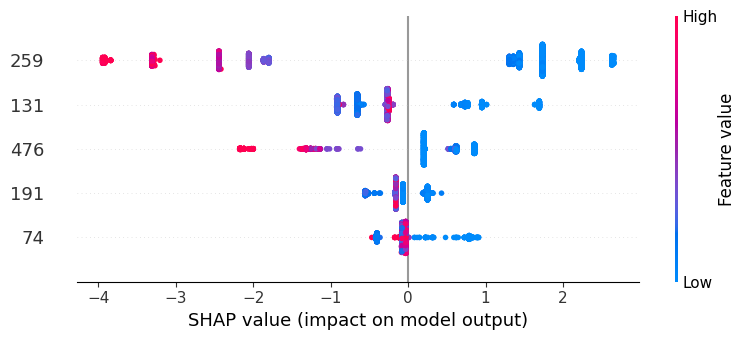

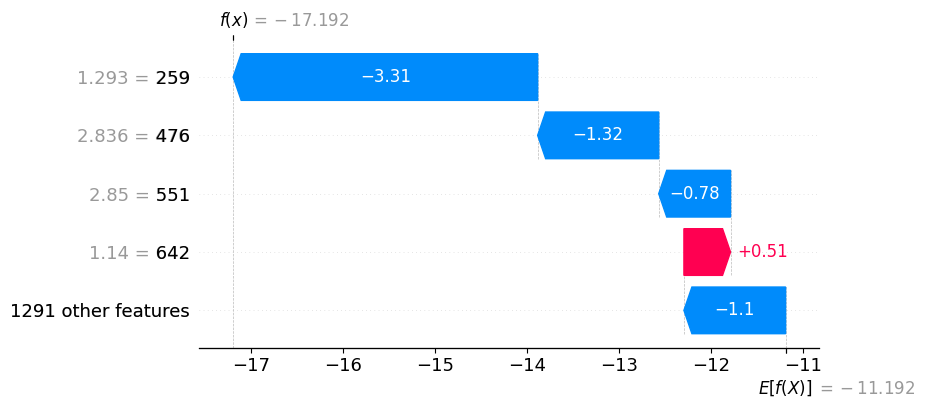

In [13]:
import shap
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
model = XGBRegressor(objective='reg:linear', eval_metric = 'rmse', learning_rate = 1, reg_lambda = 0,
                         max_depth = 3, subsample = 1, colsample_bytree = 0.2, min_child_weight = 10, n_estimators = 200)
model.fit(X_train, y_train)
explainer = shap.Explainer(model)
shap_values = explainer(X_test)

# Plot de resumen para todas las características
shap.summary_plot(shap_values, X_test, max_display=5)
# Plot de valores de SHAP para una muestra
shap.plots.waterfall(shap_values[0], max_display=5)

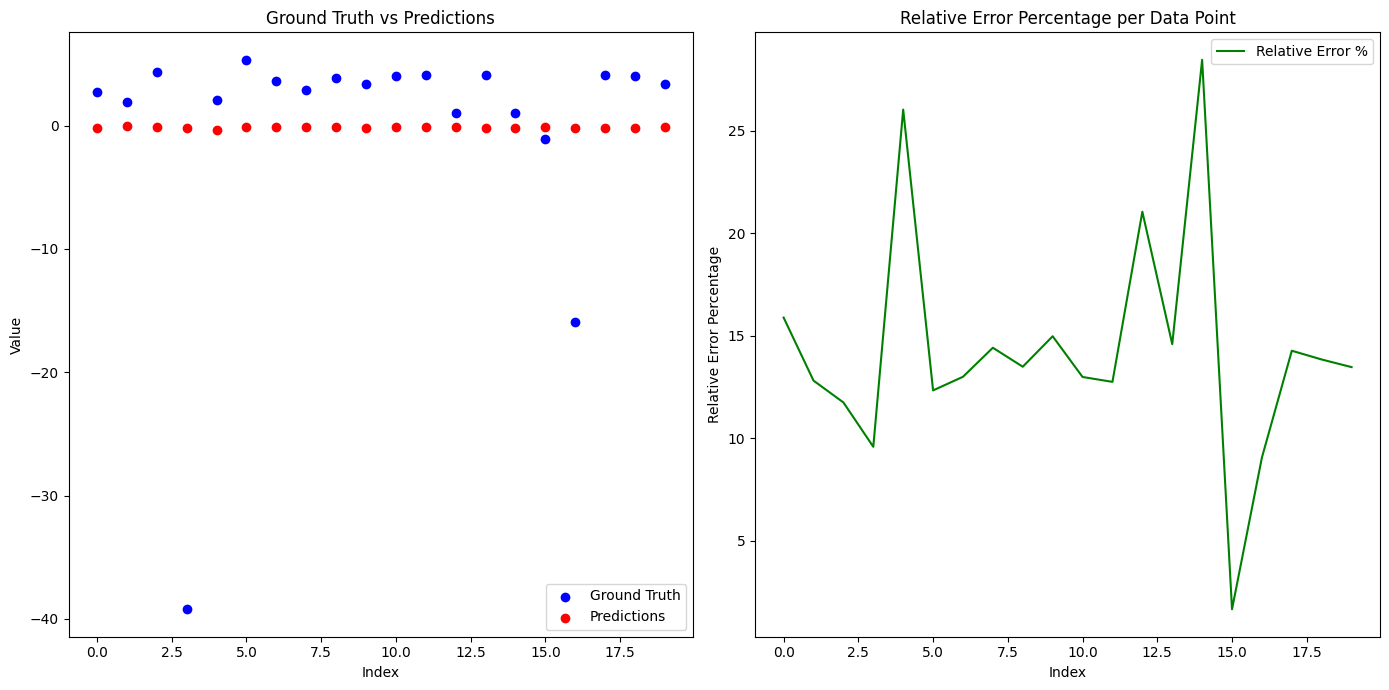

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

# Provided data from the image
ground_truth_y = [2.740435, 1.901405, 4.359406, -39.211021, 2.090482, 5.340243, 3.650368, 2.917694, 3.898531, 3.402204, 
                  4.004887, 4.134877, 1.026924, 4.134877, 1.026924, -1.112009, -15.883648, 4.134877, 4.040339, 3.402204]

predictions = [-0.161210, -0.053353, -0.075869, -0.166351, -0.335168, -0.124306, -0.109240, -0.128667, -0.135790, 
               -0.169106, -0.119457, -0.113471, -0.113471, -0.189598, -0.189598, -0.129514, -0.150442, -0.176304, 
               -0.154983, -0.117848]

relative_error_percentage = [15.882650, 12.805969, 11.740358, 9.575754, 26.033049, 12.327728, 12.992570, 14.409885, 
                             13.483114, 14.970489, 12.982782, 12.744240, 21.049597, 14.585325, 28.462664, 1.646871, 
                             9.052850, 14.263838, 13.835903, 13.463871]

# Create a DataFrame for plotting
df_plot = pd.DataFrame({
    'ground_truth': ground_truth_y,
    'predictions': predictions,
    'relative_error_percentage': relative_error_percentage
})

# Plot the ground truth and predictions
plt.figure(figsize=(14, 7))

# Scatter plot for ground truth and predictions
plt.subplot(1, 2, 1)
plt.scatter(range(len(ground_truth_y)), ground_truth_y, color='blue', label='Ground Truth')
plt.scatter(range(len(predictions)), predictions, color='red', label='Predictions')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Ground Truth vs Predictions')
plt.legend()

# Plot for relative error percentage
plt.subplot(1, 2, 2)
plt.plot(relative_error_percentage, color='green', label='Relative Error %')
plt.xlabel('Index')
plt.ylabel('Relative Error Percentage')
plt.title('Relative Error Percentage per Data Point')
plt.legend()

plt.tight_layout()
plt.show()
